In [1]:
import numpy as np
import matplotlib.pyplot as plt
# to plot accuracy and loss diagrams
from tensorflow import keras
# implement keras Neural Network
from keras import layers
import os
# used to find download path
import pandas as pd

In [4]:
file_path = '/content/concrete_data.csv'
df = pd.read_csv(file_path)
df.head()
#get our dataframe from the csv file

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
in_features = [
            'Cement',
            'Blast Furnace Slag',
            'Fly Ash',
            'Water',
            'Superplasticizer',
            'Coarse Aggregate',
            'Fine Aggregate',
            'Age'
]

out_features = [
                'Strength'
]
# get the input features and target labels

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[in_features].to_numpy(), df[out_features].to_numpy(),
                                                    test_size=0.3, shuffle=True)
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
y_train, y_test = y_train.astype('float32'), y_test.astype('float32')

In [7]:
print(x_train.shape, x_test.shape)
print(x_train[0])
#successfully train test splitted, show sample of one training data

(721, 8) (309, 8)
[ 182.    45.2  122.   170.2    8.2 1059.4  780.7   14. ]


In [8]:
Network = keras.Sequential([
                            keras.Input(shape=(8, )),
                            layers.Dense(10, activation="relu", name="layer1"),
                            layers.Dense(1, name="output"),
    ])
#create our network

In [9]:
Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                90        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Network.compile(loss='mse', optimizer= keras.optimizers.Adam(), metrics=['mse'])
# NUM_EPOCHS = 50


In [11]:
# train_log = Network.fit(x=x_train, y=y_train, epochs=NUM_EPOCHS, batch_size=32, verbose=1)
# #get the training loss of each epoch

Epoch 1/50
23/23 [==============================] - 2s 4ms/step - loss: 38953.2812 - mse: 38953.2812
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 9901.6729 - mse: 9901.6729
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 4435.7769 - mse: 4435.7769
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 4190.0776 - mse: 4190.0776
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 3980.8423 - mse: 3980.8423
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 3818.9612 - mse: 3818.9612
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 3665.9084 - mse: 3665.9084
Epoch 8/50
23/23 [==============================] - 0s 6ms/step - loss: 3512.4563 - mse: 3512.4563
Epoch 9/50
23/23 [==============================] - 0s 5ms/step - loss: 3349.1353 - mse: 3349.1353
Epoch 10/50
23/23 [==============================] - 0s 8ms/step - loss: 3203.6123 - mse: 3203.6123
Epoch 1

### Got the model to train it on the data with mse(Mean_Squared_Error) Optimzer is Adam




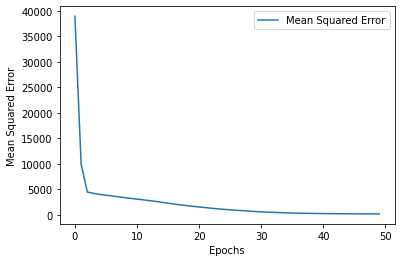

[38953.28125, 9901.6728515625, 4435.77685546875, 4190.07763671875, 3980.84228515625, 3818.961181640625, 3665.908447265625, 3512.456298828125, 3349.13525390625, 3203.6123046875, 3058.336669921875, 2910.549560546875, 2755.75927734375, 2604.47265625, 2426.1337890625, 2256.696533203125, 2085.256103515625, 1927.168212890625, 1780.0751953125, 1640.7862548828125, 1515.3922119140625, 1387.9813232421875, 1269.0401611328125, 1157.5706787109375, 1050.857666015625, 951.0338745117188, 863.388427734375, 786.548828125, 698.808837890625, 626.6258544921875, 563.1597900390625, 508.3741760253906, 451.1308898925781, 405.2875671386719, 363.02764892578125, 328.1825866699219, 299.5567626953125, 272.90716552734375, 253.36654663085938, 235.94996643066406, 221.61773681640625, 206.6769256591797, 193.5065155029297, 183.9561767578125, 176.01422119140625, 168.7740020751953, 163.70684814453125, 158.83920288085938, 157.404296875, 151.81248474121094]


In [16]:
# #show the training process
# plt.plot(train_log.history['loss'], label='Mean Squared Error')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.show()
# print(train_log.history['loss'])

In [31]:
def Train(Model, model_nums, epochs):
  Loss_array = np.ndarray([])
  score = np.ndarray([])
  for i in range(model_nums):

    model = keras.models.clone_model(Model)
    #refreshing our model every time

    model.compile(loss='mse', optimizer= keras.optimizers.Adam(), metrics=['mse'])
    NUM_EPOCHS = 50
    model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=64, verbose=1)

    #getting our prediction
    res = model.evaluate(x=x_test, y=y_test)
    print(res)
    score = np.hstack([score, res[0]])
  return score


In [32]:
model_num = 50
epochs_num = 50
res = Train(Network, model_num, epochs_num)

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 0s 2ms/step - loss: 350.2296 - mse: 350.2296
[350.2296447753906, 350.2296447753906]
Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 397558.1562 - mse: 397558.1562
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 268714.2812 - mse: 268714.2812
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 169594.3750 - mse: 169594.3750
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 101248.0469 - mse: 101248.0469
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 58571.0195 - mse: 58571.0195
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 34028.2812 - mse: 34028.2812
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 20922.5000 - mse: 20922.5000
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 15632.6738 - mse: 15632.6738
Epoch 9/

In [34]:
print(np.mean(res), '\n', np.std(res))

790.7402509801528 
 815.0928438044866


# These are our results!!!
mean :790.7402509801528 

standard deviation: 815.0928438044866